In [ ]:
from tensorflow.keras.layers import Input, Flatten, Dense, Lambda
from tensorflow.keras.applications.resnet50 import ResNet50, preprocess_input
from tensorflow.keras.models import Model,Sequential
from tensorflow.keras.preprocessing import image
from tensorflow.keras.preprocessing.image import ImageDataGenerator,img_to_array,load_img
import numpy as np
from glob import glob

In [ ]:
train_dir='/content/drive/MyDrive/dataset/CottonDisease/train'
val_dir='/content/drive/MyDrive/dataset/CottonDisease/val'
test_dir='/content/drive/MyDrive/dataset/CottonDisease/test'

In [ ]:
imageSize=[224,224]

In [ ]:
resnet=ResNet50(include_top=False,weights='imagenet',input_shape=imageSize+[3])

94781440/94765736 [==============================] - 1s 0us/step


In [ ]:
for layer in resnet.layers:
  layer.trainable=False


In [ ]:
folders=glob(train_dir+'/*')

In [ ]:
x=Flatten()(resnet.output)
predictions=Dense(len(folders),activation='softmax')(x)
model=Model(inputs=resnet.input,outputs=predictions)

In [ ]:
model.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 224, 224, 3  0           []                               
                                )]                                                                
                                                                                                  
 conv1_pad (ZeroPadding2D)      (None, 230, 230, 3)  0           ['input_1[0][0]']                
                                                                                                  
 conv1_conv (Conv2D)            (None, 112, 112, 64  9472        ['conv1_pad[0][0]']              
                                )                                                                 
                                                                                              

In [ ]:
train_gen=ImageDataGenerator(
    rescale=1./255,
    shear_range=0.2,
    rotation_range=40,
    width_shift_range=0.2,
    height_shift_range=0.2,
    zoom_range=0.2
)
test_gen=ImageDataGenerator(
    rescale=1./255
)
val_gen=ImageDataGenerator(
    rescale=1./255
)

In [ ]:
train_data=train_gen.flow_from_directory(
    train_dir,
    target_size=(224,224),
    batch_size=32,
    class_mode='categorical'
)
test_data=test_gen.flow_from_directory(
    test_dir,
    target_size=(224,224),
    batch_size=32,
    class_mode='categorical'
)
val_data=val_gen.flow_from_directory(
    val_dir,
    target_size=(224,224),
    batch_size=32,
    class_mode='categorical'
)

FileNotFoundError: ignored

In [ ]:
model.compile(optimizer='adam',loss='categorical_crossentropy',metrics=['accuracy'])

In [ ]:
history=model.fit_generator(
    train_data,
    epochs=20,
    validation_data=val_data,
    steps_per_epoch=len(train_data),
    validation_steps=len(val_data)
)

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/training.py:1940: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '


Epoch 1/20
61/61 [==============================] - 36s 587ms/step - loss: 1.0385 - accuracy: 0.5874 - val_loss: 0.9456 - val_accuracy: 0.6389
Epoch 2/20
61/61 [==============================] - 37s 607ms/step - loss: 0.8899 - accuracy: 0.6458 - val_loss: 0.7776 - val_accuracy: 0.6667
Epoch 3/20
61/61 [==============================] - 36s 588ms/step - loss: 0.9496 - accuracy: 0.6274 - val_loss: 0.6423 - val_accuracy: 0.7747
Epoch 4/20
61/61 [==============================] - 37s 600ms/step - loss: 1.0162 - accuracy: 0.6012 - val_loss: 0.9251 - val_accuracy: 0.6142
Epoch 5/20
61/61 [==============================] - 37s 599ms/step - loss: 0.8840 - accuracy: 0.6607 - val_loss: 0.9593 - val_accuracy: 0.6728
Epoch 6/20
61/61 [==============================] - 36s 597ms/step - loss: 0.8205 - accuracy: 0.6853 - val_loss: 0.6028 - val_accuracy: 0.7654
Epoch 7/20
61/61 [==============================] - 37s 607ms/step - loss: 1.3235 - accuracy: 0.5879 - val_loss: 2.4499 - val_accuracy: 0.3796

In [ ]:
import matplotlib.pyplot as plt

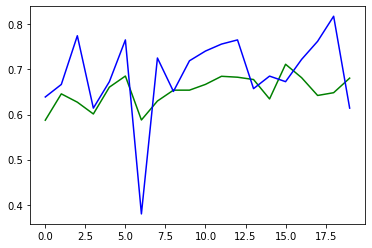

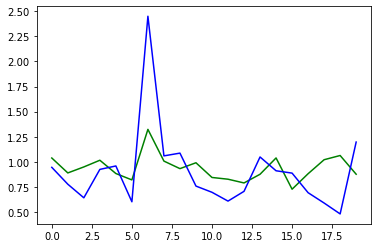

In [ ]:
plt.figure()
plt.plot(history.history['accuracy'],color='g')
plt.plot(history.history['val_accuracy'],color='b')
plt.show()
plt.figure()
plt.plot(history.history['loss'],color='g')
plt.plot(history.history['val_loss'],color='b')
plt.show()

In [ ]:
import numpy as np

In [ ]:
pred=[]
predArr=model.predict(test_data)
for i in predArr:
  pred.append(np.argmax(i))
pred

[1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 2, 2, 2, 1, 3, 1, 1]

In [ ]:
test_data.classes

array([0, 0, 0, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 3, 3, 3, 3, 3], dtype=int32)

In [ ]:
for i in predArr:
  print(np.argmax(i))

1
0
2
0
3
2
1
1
1
3
2
3
2
0
3
2
3
3


In [ ]:
from sklearn.metrics import confusion_matrix
cm=confusion_matrix(pred,test_data.classes)

In [ ]:
cm

array([[0, 1, 0, 0],
       [3, 4, 3, 3],
       [0, 0, 2, 1],
       [0, 0, 0, 1]])

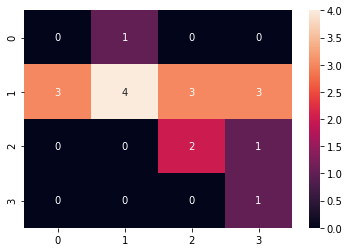

In [ ]:
import seaborn as sns
sns.heatmap(cm, annot=True)

In [ ]:
model.save('/content/drive/MyDrive/dataset/CottonDisease/resnetCottonDisease.h5')

NameError: ignored